In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Uploading our dataset
df = pd.read_csv("C:/Users/Faith/Downloads/apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
#Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [5]:
#Data types
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [6]:
#Checking for null values
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

Initial adjustments

We are going to do some adjustments before the data vizualization:
1. Drop the last row because the NaN value are coming from there.
2. Conver the feature names to lowercase because I like them this way.
3. Convert 'acidity' to float and 'quality' to boolean.

In [7]:
columns_original = list(df.columns)
columns_lower = list(map(lambda x: x.lower(), columns_original))
columns_new = {key: value for (key, value) in zip(columns_original, columns_lower)}
df = df.rename(columns=columns_new)

In [11]:
df['acidity'] = pd.to_numeric(df['acidity'], errors='coerce')

# Now, you can safely convert the "acidity" column to float
df['acidity'] = df['acidity'].astype(float)

# Update the "quality" column based on the condition
mask = df['quality'] == 'good'
df['quality'] = mask


# Data Visualization

In [12]:
from pandas.plotting import scatter_matrix

%matplotlib inline
colors = sns.color_palette()
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

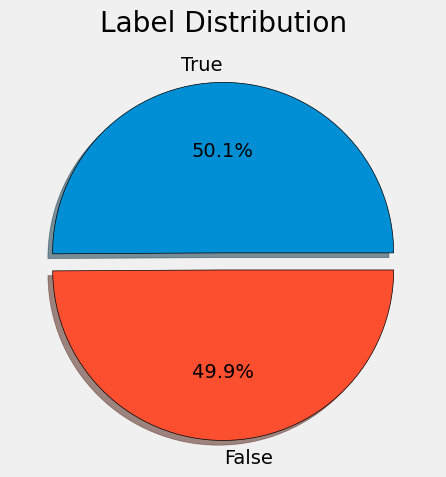

In [13]:
classes = df['quality'].value_counts(dropna=False).to_frame('amount')
slices = classes.to_numpy().ravel()
labels = classes.index.to_list()
explode = [0, 0.1]

plt.style.use("fivethirtyeight")
plt.figure(figsize=(5, 5))
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Label Distribution')
plt.tight_layout()
plt.show()

Conlusion: This dataset is balanced, so we don't need to apply any oversameple or undersample technique. And because of this balance we can trust in 'accuracy' as metric.

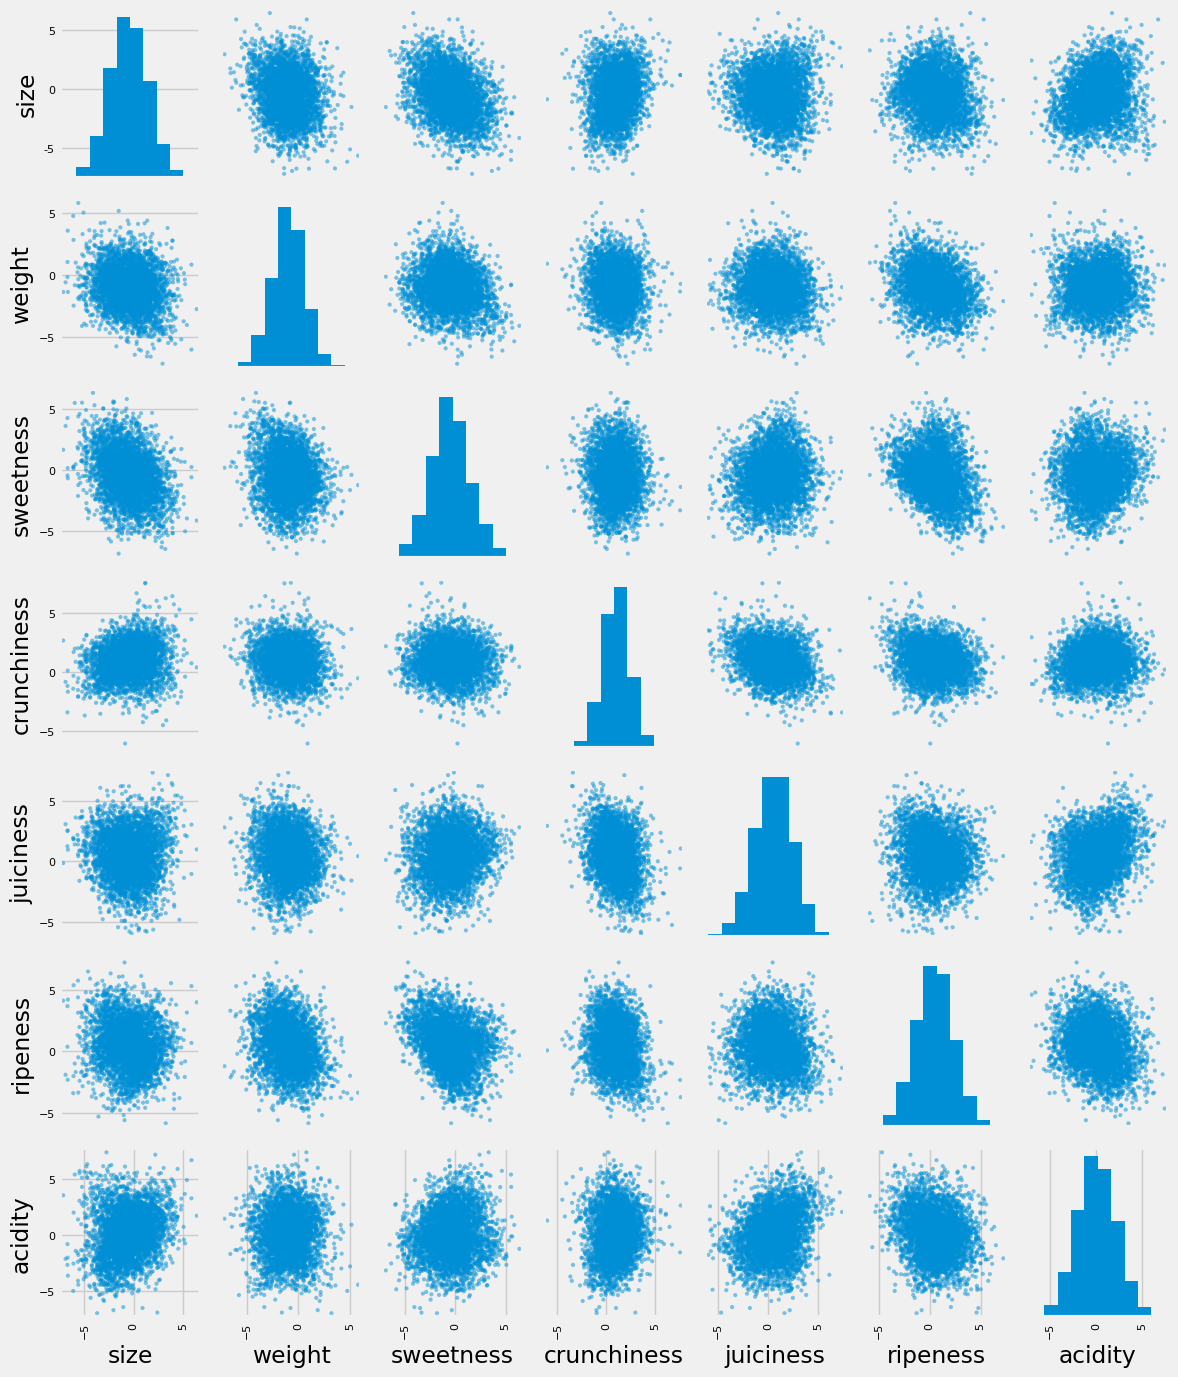

In [14]:
axis = scatter_matrix(df[['size', 'weight', 'sweetness', 'crunchiness', 'juiciness', 'ripeness', 'acidity']], figsize=(12, 14))
plt.tight_layout()
plt.show()